In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Hands on/marriage_divorce_india_with_id.csv') ##Replace this path with ur file path

In [3]:
df.head()

,Unique ID,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children,Divorce Status
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unique ID                     1200 non-null   object
 1   Marriage Duration (Years)     1200 non-null   int64 
 2   Age at Marriage               1200 non-null   int64 
 3   Marriage Type                 1200 non-null   object
 4   Education Level               1200 non-null   object
 5   Income Level (INR per month)  1200 non-null   int64 
 6   Caste/Religion                1200 non-null   object
 7   Urban/Rural                   1200 non-null   object
 8   Family Involvement            1200 non-null   object
 9   Children                      1200 non-null   int64 
 10  Divorce Status                1200 non-null   object
dtypes: int64(4), object(7)
memory usage: 103.3+ KB


In [5]:
#Checking the shape of the dataframe
df.shape

(1200, 11)

In [6]:
#Checking whether there is a null values or not
df.isnull().sum()

,0
Unique ID,0
Marriage Duration (Years),0
Age at Marriage,0
Marriage Type,0
Education Level,0
Income Level (INR per month),0
Caste/Religion,0
Urban/Rural,0
Family Involvement,0
Children,0


In [7]:
#Dropping the unrequired columns
df = df.drop(columns=['Unique ID'])  ## Removing the unrequired columns

In [8]:
#Getting the info of the Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Marriage Duration (Years)     1200 non-null   int64 
 1   Age at Marriage               1200 non-null   int64 
 2   Marriage Type                 1200 non-null   object
 3   Education Level               1200 non-null   object
 4   Income Level (INR per month)  1200 non-null   int64 
 5   Caste/Religion                1200 non-null   object
 6   Urban/Rural                   1200 non-null   object
 7   Family Involvement            1200 non-null   object
 8   Children                      1200 non-null   int64 
 9   Divorce Status                1200 non-null   object
dtypes: int64(4), object(6)
memory usage: 93.9+ KB


In [9]:
df.head(4)

,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children,Divorce Status
0,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No
1,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes
2,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes
3,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes


In [10]:
#Train-test split
from sklearn.model_selection import train_test_split

X = df.drop('Divorce Status',axis = 1)
y = df['Divorce Status']

In [11]:
X.head(5)

,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children
0,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2
1,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0
2,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4
3,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1
4,21,34,Love,Secondary,28666,Jain,Urban,High,1


In [12]:
y.head()

,Divorce Status
0,No
1,Yes
2,Yes
3,Yes
4,Yes


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(960, 9) (240, 9)


In [14]:
#Label encoding of the object type columns for calculations.
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate over each column of X_train
for col in X_train.columns:
    # Check if the column contains object (string) data
    if X_train[col].dtype == 'object':
        # Fit the encoder on the training data and transform it
        X_train[col] = encoder.fit_transform(X_train[col])
        # Transform the test data using the same encoder
        X_test[col] = encoder.transform(X_test[col])


In [15]:
#K-Nearest  neighbours algorithm
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [16]:
y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.6541666666666667

In [17]:
#Logistic Regression
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X_train, y_train)

In [18]:
y_pred = loj_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy

0.7125

In [19]:
#Random FOrest Algorithm
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [20]:
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.6958333333333333

In [21]:
#Encoding of the labels.
encoder = LabelEncoder()

# Fit the encoder on the target variable and transform it
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Now you can fit the XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)

In [22]:
#XGBoost Algorithm
y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_accuracy

0.625

In [23]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
# SVM
svc_model = SVC(kernel='rbf', probability=True).fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {svc_accuracy:.2f}")


SVM Accuracy: 0.71


In [25]:
# Naive Bayes
nb_model = GaussianNB().fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")


Naive Bayes Accuracy: 0.71


In [26]:
# Gradient Boosting
gb_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")

Gradient Boosting Accuracy: 0.70


In [27]:
# Decision Tree
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.60


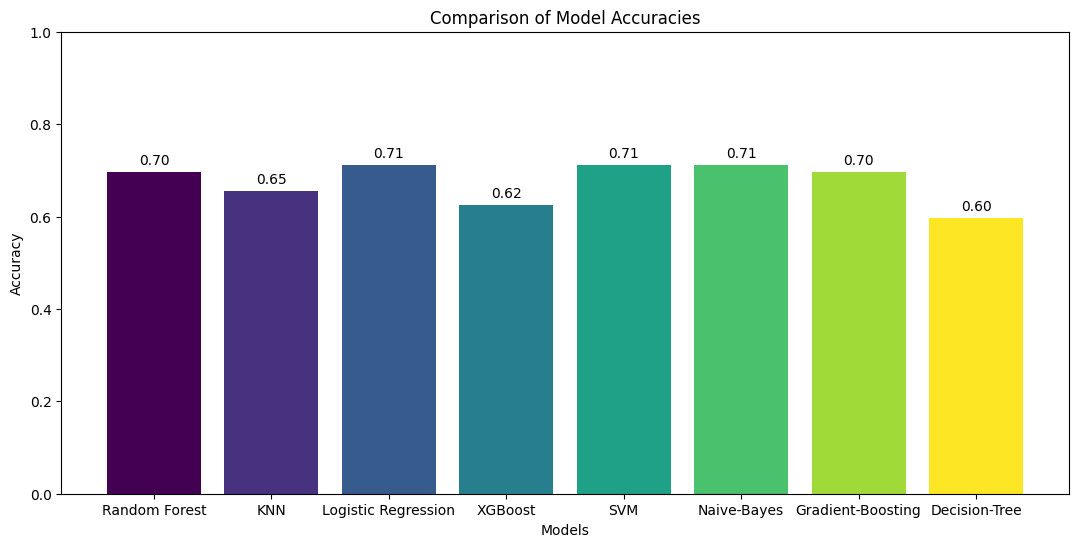

In [28]:
models = ['Random Forest', 'KNN', 'Logistic Regression', 'XGBoost',"SVM","Naive-Bayes","Gradient-Boosting",'Decision-Tree']
accuracies = [rf_accuracy, knn_accuracy, lr_accuracy, xgb_accuracy,svc_accuracy,nb_accuracy,gb_accuracy,dt_accuracy]

colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

plt.figure(figsize=(13,6))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)

for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()

In [29]:
# Collecting all model accuracies
results = {
    "Model": ["KNN", "Logistic Regression", "Random Forest", "XGBoost", "SVM", "Naive Bayes", "Gradient Boosting", "Decision Tree"],
    "Accuracy": [knn_accuracy, lr_accuracy, rf_accuracy, xgb_accuracy, svc_accuracy, nb_accuracy, gb_accuracy, dt_accuracy]
}

# Display as a table
print(tabulate(results, headers="keys", tablefmt="fancy_grid"))


╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ KNN                 │   0.654167 │
├─────────────────────┼────────────┤
│ Logistic Regression │   0.7125   │
├─────────────────────┼────────────┤
│ Random Forest       │   0.695833 │
├─────────────────────┼────────────┤
│ XGBoost             │   0.625    │
├─────────────────────┼────────────┤
│ SVM                 │   0.7125   │
├─────────────────────┼────────────┤
│ Naive Bayes         │   0.7125   │
├─────────────────────┼────────────┤
│ Gradient Boosting   │   0.695833 │
├─────────────────────┼────────────┤
│ Decision Tree       │   0.595833 │
╘═════════════════════╧════════════╛
